# i wish this project is not large as i think
##  thanks in advance

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
TABLE_COUNTRY='Database_Soccer/Country.csv'
TABLE_LEAGUE='Database_Soccer/League.csv'
TABLE_MATCH='Database_Soccer/Match.csv'
TABLE_PLAYER='Database_Soccer/Player.csv'
TABLE_PLAYER_ATTRIBUTES='Database_Soccer/Player_Attributes.csv'
TABLE_TEAM='Database_Soccer/Team.csv'
TABLE_TEAM_ATTRIBUTES='Database_Soccer/Team_Attributes.csv'
pd.options.mode.chained_assignment = None

In [6]:
# Upgrade pandas to use dataframe.explode() function.
df_T=pd.read_csv(TABLE_TEAM)
df_T_A=pd.read_csv(TABLE_TEAM_ATTRIBUTES)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [7]:
df_merged_TA=pd.merge(left=df_T,left_on='team_fifa_api_id',right=df_T_A,right_on='team_fifa_api_id',how='inner')
df_merged_TA.fillna(df_merged_TA['buildUpPlayDribbling'].mean(),inplace=True)
df_merged_TA.drop_duplicates(inplace=True)
df_merged_TA.drop(columns=['id_y','team_api_id_x','team_api_id_y','team_fifa_api_id','id_x'],inplace=True)
df_merged_TA.head()

,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,48.629555,Little,45,Mixed,Organised,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,48.629555,Little,52,Mixed,Organised,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,48.629555,Little,55,Mixed,Organised,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,48.629555,Little,38,Mixed,Organised,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,52.000000,Normal,38,Mixed,Organised,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [8]:
df_merged_TA['date']=pd.to_datetime(df_merged_TA['date'])
df_merged_TA['year']=pd.DatetimeIndex(df_merged_TA['date']).year
df_merged_TA.head()

,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,KRC Genk,GEN,2010-02-22,45,Balanced,48.629555,Little,45,Mixed,Organised,...,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010
1,KRC Genk,GEN,2011-02-22,66,Balanced,48.629555,Little,52,Mixed,Organised,...,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap,2011
2,KRC Genk,GEN,2012-02-22,53,Balanced,48.629555,Little,55,Mixed,Organised,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2012
3,KRC Genk,GEN,2013-09-20,58,Balanced,48.629555,Little,38,Mixed,Organised,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2013
4,KRC Genk,GEN,2014-09-19,58,Balanced,52.000000,Normal,38,Mixed,Organised,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2014


In [9]:
df_L=pd.read_csv(TABLE_LEAGUE)
df_C=pd.read_csv(TABLE_COUNTRY)
df_merged_LC=pd.merge(left=df_C,left_on='id',right=df_L,right_on='country_id')
df_merged_LC.drop(columns=['country_id','id_y'],inplace=True)
df_merged_LC.rename(columns={'id_x':'id','name_x':'country','name_y':'league name'},inplace=True)
df_merged_LC

,id,country,league name
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In [10]:
df_P=pd.read_csv(TABLE_PLAYER)
df_P_A=pd.read_csv(TABLE_PLAYER_ATTRIBUTES)

### here we try to fix the data the best pracitse is to fill the NAN values with the mean but for each player

In [11]:
df_P_A.groupby('player_api_id').apply(lambda x:x.ffill().bfill())
df_P_A.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [12]:
df_P_A.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


# there is no way this data can be fixed so we should delete it

#

In [13]:
df_P_A.dropna(inplace=True)
df_P_A.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [14]:
df_merged_PA=pd.merge(left=df_P[['player_fifa_api_id','player_name','birthday','height','weight']],left_on='player_fifa_api_id',right=df_P_A,right_on='player_fifa_api_id',how='left')
df_merged_PA.drop(columns=['id','player_api_id'])
df_merged_PA.head()

,player_fifa_api_id,player_name,birthday,height,weight,id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1.0,505942.0,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2.0,505942.0,2015-11-19 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3.0,505942.0,2015-09-21 00:00:00,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4.0,505942.0,2015-03-20 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5.0,505942.0,2007-02-22 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
df_merged_PA['date']=pd.to_datetime(df_merged_PA['date'])
df_merged_PA['year']=pd.DatetimeIndex(df_merged_PA['date']).year
df_merged_PA['year']
df_merged_PA.head()

,player_fifa_api_id,player_name,birthday,height,weight,id,player_api_id,date,overall_rating,potential,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1.0,505942.0,2016-02-18,67.0,71.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016.0
1,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2.0,505942.0,2015-11-19,67.0,71.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015.0
2,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3.0,505942.0,2015-09-21,62.0,66.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015.0
3,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4.0,505942.0,2015-03-20,61.0,65.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015.0
4,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5.0,505942.0,2007-02-22,61.0,65.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007.0


In [16]:
df_merged_PA.head()
df_merged_PA.drop(columns=['id','player_api_id'],inplace=True)

In [17]:
df_M=pd.read_csv(TABLE_MATCH)
df_M.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [18]:
df_M.head(10)
df_M.info(max_cols=116)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

In [19]:
df_M['date']=pd.to_datetime(df_M['date'])
df_M['year']=pd.DatetimeIndex(df_M['date']).year

### the data missing is so large so we should fix them the best practise is to fill the na with mean value of each team not the dataFrame as whole  

In [20]:
df_M.isna().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBA           11817
BSH           11818
BSD           11818
BSA           11818
year              0
Length: 116, dtype: int64

In [21]:
df_M.groupby('home_team_api_id').apply(lambda x:x.fillna(x.mean(),inplace=True))
df_M.isna().sum()

C:\Users\user\AppData\Local\Temp/ipykernel_4720/2082942448.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_M.groupby('home_team_api_id').apply(lambda x:x.fillna(x.mean(),inplace=True))
C:\Users\user\AppData\Local\Temp/ipykernel_4720/2082942448.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_M.groupby('home_team_api_id').apply(lambda x:x.fillna(x.mean(),inplace=True))


id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBA           11817
BSH           11818
BSD           11818
BSA           11818
year              0
Length: 116, dtype: int64

### there is no way this data can be fixed so we should delete them

In [22]:
df_M.dropna(inplace=True)
df_M.drop_duplicates(inplace=True)

In [23]:
df_M.isna().sum()

id            0
country_id    0
league_id     0
season        0
stage         0
             ..
GBA           0
BSH           0
BSD           0
BSA           0
year          0
Length: 116, dtype: int64

In [24]:
df_merged_CLM=pd.merge(left=df_merged_LC,left_on='id',right=df_M,right_on='country_id')
df_merged_CLM.drop(columns=['id_x','id_y','country_id','league_id'],inplace=True)

In [25]:
df_merged_CLMT=pd.merge(left=df_T,left_on='team_api_id',right=df_merged_CLM,right_on='home_team_api_id')
df_merged_CLMT.drop(columns=['team_api_id','team_fifa_api_id','team_short_name','home_team_api_id'],inplace=True)
df_merged_CLMT.rename(columns={'team_long_name':'home_team_api_name'})
df_merged_CLMT.head()

,id,team_long_name,country,league name,season,stage,date,match_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,year
0,3457,Manchester United,England,England Premier League,2012/2013,10,2012-11-03,1229198,9825,2,...,1.75,3.8,5.25,1.70,4.00,5.0,1.62,3.8,5.5,2012
1,3457,Manchester United,England,England Premier League,2012/2013,13,2012-11-24,1229232,10172,3,...,1.18,8.0,19.00,1.18,6.25,16.0,1.14,7.5,17.0,2012
2,3457,Manchester United,England,England Premier League,2012/2013,14,2012-11-28,1229240,8654,1,...,1.25,6.5,13.00,1.22,6.00,12.0,1.22,6.0,13.0,2012
3,3457,Manchester United,England,England Premier League,2012/2013,17,2012-12-15,1229275,8472,3,...,1.22,6.5,17.00,1.18,6.75,13.5,1.20,6.5,11.0,2012
4,3457,Manchester United,England,England Premier League,2012/2013,19,2012-12-26,1229300,10261,4,...,1.25,6.5,13.00,1.22,6.50,11.0,1.25,6.0,10.0,2012


In [26]:
df_merged_CLMT=pd.merge(left=df_T[['team_long_name','team_api_id']],left_on='team_api_id',right=df_merged_CLMT,right_on='away_team_api_id')
df_merged_CLMT.rename(columns={'team_long_name_y':'away_team_name','team_long_name_x':'home_team_name'},inplace=True)

In [27]:
df_merged_CLMT.drop(columns=['team_api_id'],inplace=True)

In [28]:
df_merged_CLMT.head()

,home_team_name,id,away_team_name,country,league name,season,stage,date,match_api_id,away_team_api_id,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,year
0,Manchester United,3458,Newcastle United,England,England Premier League,2012/2013,7,2012-10-07,1229165,10260,...,4.10,3.75,1.92,3.90,3.5,1.90,4.00,3.40,1.91,2012
1,Manchester United,3459,Arsenal,England,England Premier League,2012/2013,35,2013-04-28,1229471,10260,...,2.30,3.30,3.50,2.10,3.5,3.30,2.25,3.50,3.00,2013
2,Manchester United,3460,West Bromwich Albion,England,England Premier League,2012/2013,38,2013-05-19,1228315,10260,...,4.20,3.90,1.85,4.50,3.6,1.75,4.33,3.60,1.80,2013
3,Manchester United,3461,Sunderland,England,England Premier League,2012/2013,31,2013-03-30,1229436,10260,...,6.00,4.00,1.65,5.50,3.8,1.62,5.50,3.75,1.62,2013
4,Manchester United,3462,Liverpool,England,England Premier League,2012/2013,5,2012-09-23,1228368,10260,...,2.75,3.30,2.75,2.75,3.4,2.60,2.70,3.20,2.60,2012


# the following step is just minimize the effort of loading all the above 
# saving all the above into csv files 

In [29]:
df_merged_CLMT.to_csv('df_merged_country_league_match_team.csv',index=False)
df_merged_PA.to_csv('df_merged_player_attributes.csv',index=False)
df_merged_TA.to_csv('df_merged_team_attributes.csv',index=False)

In [30]:
df_merged_CLMT=pd.read_csv('df_merged_country_league_match_team.csv')
df_merged_PA=pd.read_csv('df_merged_player_attributes.csv')
df_merged_TA=pd.read_csv('df_merged_team_attributes.csv')
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_merged_PA.drop_duplicates(inplace=True)
df_merged_CLMT.drop_duplicates(inplace=True)
df_merged_TA.drop_duplicates(inplace=True)
df_merged_TA.dropna(inplace=True)
df_merged_PA.dropna(inplace=True)
df_merged_CLMT.dropna(inplace=True)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [31]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (what is the best player,team  each year seasons 2007 to 2016)
####to ansower this question i had to discover soccer world from some resourses like these ones
#https://sports.bluesombrero.com/Default.aspx?tabid=416656
#https://mypersonalfootballcoach.com/top-5-soccer-player-attributes-needed-to-be-a-great-footballer/

In [32]:
df_merged_PA.iloc[:,0:20].describe()

,player_fifa_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing
count,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000
mean,166816.321037,181.873969,168.764496,68.634968,73.478901,55.140188,49.958712,57.265982,62.485912,49.488214,59.263564,53.000011,49.389580,57.086093
std,52826.023630,6.403890,15.110382,7.028364,6.581802,17.245794,19.040921,16.478167,14.171801,18.252432,17.739597,18.244606,17.818867,14.412027
min,2.000000,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000
25%,156616.000000,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000
50%,183789.000000,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000
75%,200138.000000,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000
max,234141.000000,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000


In [33]:
df_merged_PA.iloc[:,19:32].describe()

,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression
count,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000
mean,57.086093,63.453237,67.706968,68.099404,65.993039,66.146877,65.189241,61.866945,66.979833,67.054200,67.434374,53.386635,60.950220
std,14.412027,15.186857,13.010732,12.586447,12.962910,9.145452,13.076250,16.129878,11.016804,13.200794,12.085002,18.370261,16.100796
min,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000
25%,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000
50%,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000
75%,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000
max,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000


In [34]:
df_merged_PA.iloc[:,31:44].describe()


,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000,180294.000000
mean,60.950220,51.904073,55.729153,57.867073,54.933536,46.765539,50.361077,48.036208,14.695775,15.947502,20.526662,16.014881,16.324154
std,16.100796,19.481542,18.457494,15.151428,15.556646,21.225350,21.495449,21.592373,16.839940,15.840376,21.143763,16.070277,17.184013
min,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [35]:
df_merged_PA.groupby('year').apply(lambda x:x[x['overall_rating']==x['overall_rating'].max()])
df_merged_PA.head()

player_fifa_api_id        player_name             birthday  \
year                                                                        
2007.0 62780                 1179   Gianluigi Buffon  1978-01-28 00:00:00   
       176089               54050       Wayne Rooney  1985-10-24 00:00:00   
2008.0 32765                20801  Cristiano Ronaldo  1985-02-05 00:00:00   
       71367                 5479      Iker Casillas  1981-05-20 00:00:00   
2009.0 71366                 5479      Iker Casillas  1981-05-20 00:00:00   
2010.0 71364                 5479      Iker Casillas  1981-05-20 00:00:00   
       100836              158023       Lionel Messi  1987-06-24 00:00:00   
       100837              158023       Lionel Messi  1987-06-24 00:00:00   
2011.0 100834              158023       Lionel Messi  1987-06-24 00:00:00   
2012.0 100832              158023       Lionel Messi  1987-06-24 00:00:00   
       100833              158023       Lionel Messi  1987-06-24 00:00:00   
2013.0 100827              158023       Lionel Messi  1987-06-24 00:00:00   
       100828              158023       Lionel Messi  1987-06-24 00:00:00   
       100829              158023       Lionel Messi  1987-06-24 00:00:00   
       100830              158023       Lionel Messi  1987-06-24 00:00:00   
       100831              158023       Lionel Messi  1987-06-24 00:00:00   
2014.0 100826              158023       Lionel Messi  1987-06-24 00:00:00   
2015.0 100817              158023       Lionel Messi  1987-06-24 00:00:00   
       100818              158023       Lionel Messi  1987-06-24 00:00:00   
       100819              158023       Lionel Messi  1987-06-24 00:00:00   
2016.0 107287              167495       Manuel Neuer  1986-03-27 00:00:00   
       107288              167495       Manuel Neuer  1986-03-27 00:00:00   
       107289              167495       Manuel Neuer  1986-03-27 00:00:00   
       129383              190871             Neymar  1992-02-05 00:00:00   
       129384              190871             Neymar  1992-02-05 00:00:00   

               height  weight        date  overall_rating  potential  \
year                                                                   
2007.0 62780   193.04     201  2007-02-22            93.0       93.0   
       176089  175.26     183  2007-02-22            93.0       93.0   
2008.0 32765   185.42     176  2008-08-30            91.0       94.0   
       71367   185.42     185  2008-08-30            91.0       92.0   
2009.0 71366   185.42     185  2009-02-22            91.0       92.0   
2010.0 71364   185.42     185  2010-02-22            90.0       92.0   
       100836  170.18     159  2010-08-30            90.0       95.0   
       100837  170.18     159  2010-02-22            90.0       94.0   
2011.0 100834  170.18     159  2011-08-30            94.0       96.0   
2012.0 100832  170.18     159  2012-08-31            94.0       96.0   
       100833  170.18     159  2012-02-22            94.0       96.0   
2013.0 100827  170.18     159  2013-11-15            94.0       97.0   
       100828  170.18     159  2013-09-20            94.0       97.0   
       100829  170.18     159  2013-03-22            94.0       97.0   
       100830  170.18     159  2013-03-08            94.0       97.0   
       100831  170.18     159  2013-02-15            94.0       97.0   
2014.0 100826  170.18     159  2014-04-25            94.0       97.0   
2015.0 100817  170.18     159  2015-12-17            94.0       94.0   
       100818  170.18     159  2015-10-16            94.0       94.0   
       100819  170.18     159  2015-09-21            94.0       95.0   
2016.0 107287  193.04     203  2016-04-21            90.0       90.0   
       107288  193.04     203  2016-02-19            90.0       90.0   
       107289  193.04     203  2016-02-18            90.0       90.0   
       129383  175.26     150  2016-02-04            90.0       94.0   
       129384  175.26     150  2016-01-28            90.0      

## the first attitude is to find the best player having the best overall_rating 

In [36]:
dataSeries_of_best_players_on_overall_rating=df_merged_PA.groupby('year',as_index=True).apply(lambda x:x[x['overall_rating']==x['overall_rating'].max()]['player_name'])
dataSeries_of_best_players_on_overall_rating

year          
2007.0  62780      Gianluigi Buffon
        176089         Wayne Rooney
2008.0  32765     Cristiano Ronaldo
        71367         Iker Casillas
2009.0  71366         Iker Casillas
2010.0  71364         Iker Casillas
        100836         Lionel Messi
        100837         Lionel Messi
2011.0  100834         Lionel Messi
2012.0  100832         Lionel Messi
        100833         Lionel Messi
2013.0  100827         Lionel Messi
        100828         Lionel Messi
        100829         Lionel Messi
        100830         Lionel Messi
        100831         Lionel Messi
2014.0  100826         Lionel Messi
2015.0  100817         Lionel Messi
        100818         Lionel Messi
        100819         Lionel Messi
2016.0  107287         Manuel Neuer
        107288         Manuel Neuer
        107289         Manuel Neuer
        129383               Neymar
        129384               Neymar
Name: player_name, dtype: object

### here i am trying to find the most correlated attributes with the overral ratio and resulting the following

In [37]:
df_of_correlation=df_merged_PA.corr()[['overall_rating']]
df_of_correlation[df_of_correlation['overall_rating']>0.5]

,overall_rating
overall_rating,1.000000
potential,0.765431
reactions,0.771900


In [38]:
df_of_seven_criteria=df_merged_PA[['player_name','reactions','potential','overall_rating','year','dribbling','stamina','strength','ball_control','acceleration']]
df_of_seven_criteria.head()

,player_name,reactions,potential,overall_rating,year,dribbling,stamina,strength,ball_control,acceleration
0,Aaron Appindangoye,47.0,71.0,67.0,2016.0,51.0,54.0,76.0,49.0,60.0
1,Aaron Appindangoye,47.0,71.0,67.0,2015.0,51.0,54.0,76.0,49.0,60.0
2,Aaron Appindangoye,47.0,66.0,62.0,2015.0,51.0,54.0,76.0,49.0,60.0
3,Aaron Appindangoye,46.0,65.0,61.0,2015.0,50.0,54.0,76.0,48.0,60.0
4,Aaron Appindangoye,46.0,65.0,61.0,2007.0,50.0,54.0,76.0,48.0,60.0


In [39]:
dataFrame_of_best_players_on_seven_criteria=df_of_seven_criteria.groupby('year',as_index=False).apply(lambda x:x[x['potential']==x['potential'].max()])
dataFrame_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria.groupby('year',as_index=False).apply(lambda x:x[x['reactions']==x['reactions'].max()])
dataFrame_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria.groupby('year',as_index=False).apply(lambda x:x[x['dribbling']==x['dribbling'].max()])
dataFrame_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria.groupby('year',as_index=False).apply(lambda x:x[x['stamina']==x['stamina'].max()])
dataFrame_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria.groupby('year',as_index=False).apply(lambda x:x[x['strength']==x['strength'].max()])
dataFrame_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria.groupby('year',as_index=False).apply(lambda x:x[x['ball_control']==x['ball_control'].max()])
dataFrame_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria.groupby('year',as_index=False).apply(lambda x:x[x['acceleration']==x['acceleration'].max()])
dataFrame_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria.groupby(['year'],as_index=False).max()
dataFrame_of_best_players_on_seven_criteria.set_index('year',inplace=True)
dataSeries_of_best_players_on_seven_criteria=dataFrame_of_best_players_on_seven_criteria['player_name']

In [40]:
df_of_correlation2=df_of_seven_criteria.loc[:,~df_of_seven_criteria.columns.isin(['year'])].corr()[['overall_rating']]
df_of_correlation2

,overall_rating
reactions,0.771900
potential,0.765431
overall_rating,1.000000
dribbling,0.354175
stamina,0.325637
strength,0.315835
ball_control,0.444005
acceleration,0.243936


### i used hexbins instead of scatter because the number of rows is huge!!

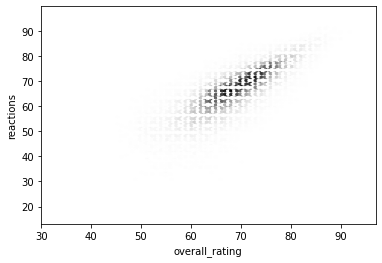

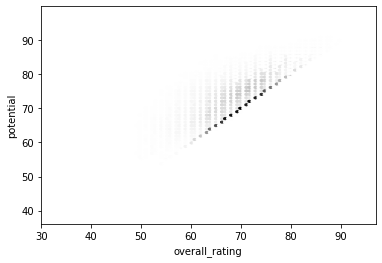

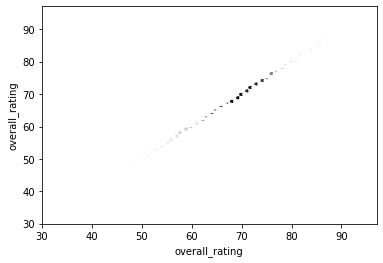

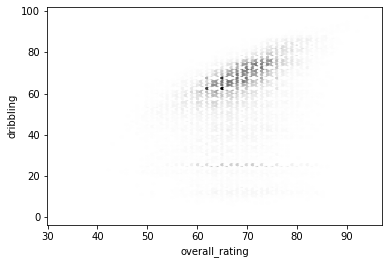

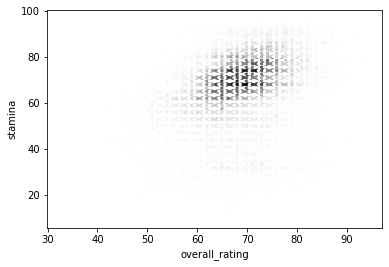

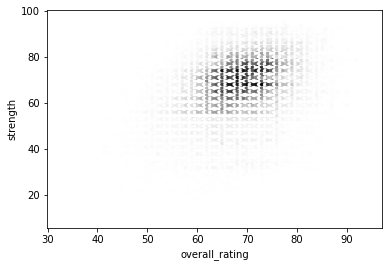

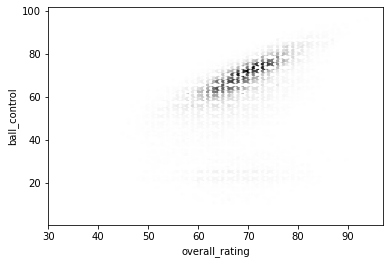

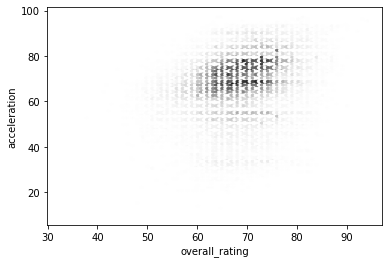

In [41]:

for n in df_of_seven_criteria.drop(columns=['player_name','year']).columns:
    fig,ax=plt.subplots()
    ax.hexbin(x=df_of_seven_criteria.groupby('year')['overall_rating'].head(180000),y=df_of_seven_criteria.groupby('year')[n].head(180000),cmap='Greys')
    plt.xlabel("overall_rating")
    plt.ylabel(n)

# as we can see there is still a good correlation between these attributes that should be cared about

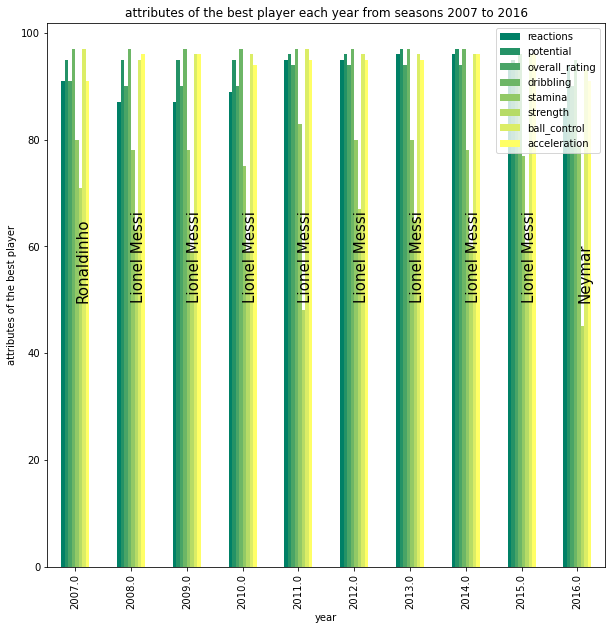

In [42]:
ax=dataFrame_of_best_players_on_seven_criteria.plot.bar(figsize=(10,10),style='stacked',cmap='summer')
ax.set_ylabel('attributes of the best player')
ax.set_title('attributes of the best player each year from seasons 2007 to 2016')
for i,v in enumerate(list(dataSeries_of_best_players_on_seven_criteria)):
    ax.annotate(str(v),(i,50),rotation='90',fontsize=15,color='black')

## depending on the seven criterias we can find that these are the best

In [43]:
dataSeries_of_best_players_on_seven_criteria

year
2007.0      Ronaldinho
2008.0    Lionel Messi
2009.0    Lionel Messi
2010.0    Lionel Messi
2011.0    Lionel Messi
2012.0    Lionel Messi
2013.0    Lionel Messi
2014.0    Lionel Messi
2015.0    Lionel Messi
2016.0          Neymar
Name: player_name, dtype: object

In [44]:
dataSeries_of_best_players_on_overall_rating

year          
2007.0  62780      Gianluigi Buffon
        176089         Wayne Rooney
2008.0  32765     Cristiano Ronaldo
        71367         Iker Casillas
2009.0  71366         Iker Casillas
2010.0  71364         Iker Casillas
        100836         Lionel Messi
        100837         Lionel Messi
2011.0  100834         Lionel Messi
2012.0  100832         Lionel Messi
        100833         Lionel Messi
2013.0  100827         Lionel Messi
        100828         Lionel Messi
        100829         Lionel Messi
        100830         Lionel Messi
        100831         Lionel Messi
2014.0  100826         Lionel Messi
2015.0  100817         Lionel Messi
        100818         Lionel Messi
        100819         Lionel Messi
2016.0  107287         Manuel Neuer
        107288         Manuel Neuer
        107289         Manuel Neuer
        129383               Neymar
        129384               Neymar
Name: player_name, dtype: object

## conclusion :
### my criteria differs than the overall_rating for players 

## now it's best team time 
### i will make a criteria based on these attributes
##### (buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,defencePressure,chanceCreationShooting,chanceCreationPassing)

In [45]:
df_merged_TA.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1472
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_long_name                  1457 non-null   object 
 1   team_short_name                 1457 non-null   object 
 2   date                            1457 non-null   object 
 3   buildUpPlaySpeed                1457 non-null   int64  
 4   buildUpPlaySpeedClass           1457 non-null   object 
 5   buildUpPlayDribbling            1457 non-null   float64
 6   buildUpPlayDribblingClass       1457 non-null   object 
 7   buildUpPlayPassing              1457 non-null   int64  
 8   buildUpPlayPassingClass         1457 non-null   object 
 9   buildUpPlayPositioningClass     1457 non-null   object 
 10  chanceCreationPassing           1457 non-null   int64  
 11  chanceCreationPassingClass      1457 non-null   object 
 12  chanceCreationCrossing          14

In [46]:
df_of_six_criteria=df_merged_TA[['team_long_name','year','buildUpPlaySpeed','buildUpPlayDribbling','buildUpPlayPassing','defencePressure','chanceCreationShooting','chanceCreationPassing']]
df_of_six_criteria.drop(columns=['year']).corr()

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,defencePressure,chanceCreationShooting,chanceCreationPassing
buildUpPlaySpeed,1.000000,0.033218,0.395536,0.046384,0.072046,0.319141
buildUpPlayDribbling,0.033218,1.000000,-0.067569,-0.008798,0.068996,0.044337
buildUpPlayPassing,0.395536,-0.067569,1.000000,-0.050478,-0.077293,0.220391
defencePressure,0.046384,-0.008798,-0.050478,1.000000,0.185587,0.203147
chanceCreationShooting,0.072046,0.068996,-0.077293,0.185587,1.000000,0.112449
chanceCreationPassing,0.319141,0.044337,0.220391,0.203147,0.112449,1.000000


In [47]:
df_of_six_criteria1=df_of_six_criteria.groupby('year',as_index=False).apply(lambda x:x[(x['buildUpPlaySpeed']>x.nlargest(5,"buildUpPlaySpeed").iloc[4]['buildUpPlaySpeed'])])
df_of_six_criteria2=df_of_six_criteria.groupby('year',as_index=False).apply(lambda x:x[x['buildUpPlayDribbling']>x.nlargest(5,"buildUpPlayDribbling").iloc[4]['buildUpPlayDribbling']])
df_of_six_criteria3=df_of_six_criteria.groupby('year',as_index=False).apply(lambda x:x[x['chanceCreationShooting']>x.nlargest(5,"chanceCreationShooting").iloc[4]['chanceCreationShooting']])
df_of_six_criteria4=df_of_six_criteria.groupby('year',as_index=False).apply(lambda x:x[x['buildUpPlayPassing']>x.nlargest(5,"buildUpPlayPassing").iloc[4]['buildUpPlayPassing']])
df_of_six_criteria5=df_of_six_criteria.groupby('year',as_index=False).apply(lambda x:x[x['defencePressure']>x.nlargest(5,"defencePressure").iloc[4]['defencePressure']])
df_of_six_criteria6=df_of_six_criteria.groupby('year',as_index=False).apply(lambda x:x[x['chanceCreationPassing']>x.nlargest(5,"chanceCreationPassing").iloc[4]['chanceCreationPassing']])

### then we find the intersection of the best of all 

In [48]:
###

In [49]:
df_intersect1=pd.merge(df_of_six_criteria1,df_of_six_criteria4,how='inner')
df_intersect1
df_intersect2=pd.merge(df_of_six_criteria1,df_of_six_criteria5,how='inner')
df_intersect2
df_intersect3=pd.merge(df_of_six_criteria1,df_of_six_criteria6,how='inner')
df_intersect3
####################
df_intersect4=pd.merge(df_of_six_criteria2,df_of_six_criteria6,how='inner')
df_intersect4
############
df_intersect5=pd.merge(df_of_six_criteria3,df_of_six_criteria6,how='inner')
df_intersect5
########################
df_intersect6=pd.merge(df_of_six_criteria4,df_of_six_criteria6,how='inner')
df_intersect6
####################
df_intersect7=pd.merge(df_of_six_criteria5,df_of_six_criteria6,how='inner')
df_intersect7
df_all=pd.concat([df_intersect1,df_intersect2,df_intersect3,df_intersect4,df_intersect4,df_intersect5,df_intersect6,df_intersect7])
df_all.set_index('year',inplace=True)

In [50]:
dataseries_of_six_criteria_best_team=df_all['team_long_name']
dataseries_of_six_criteria_best_team

year
2012             Stoke City
2013             Stoke City
2011    TSG 1899 Hoffenheim
2015      Borussia Dortmund
2011              Excelsior
2015    Bayer 04 Leverkusen
2014                 Napoli
2014                 Napoli
2012         Real Madrid CF
2013       SV Werder Bremen
2014        Birmingham City
2015        Birmingham City
2012              Málaga CF
Name: team_long_name, dtype: object

###### data_series_of_the_best_team = df_merged_TA.max()
data_series_of_the_best_team

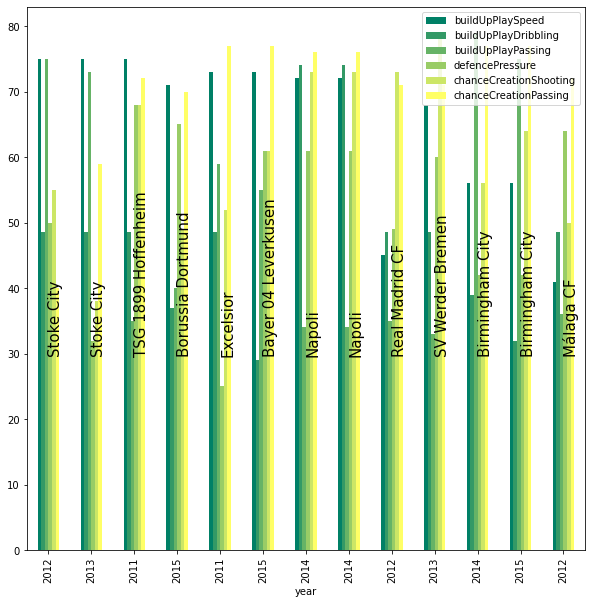

In [51]:
ax=df_all.plot.bar(figsize=(10,10),style='stacked',cmap='summer')
for i,p in enumerate(list(dataseries_of_six_criteria_best_team)):
    ax.annotate(str(dataseries_of_six_criteria_best_team.iloc[i]),(i,30),rotation='90',fontsize=15,color='black')

# hooof i finally answered the first question

## Research Question 2  
### (what is the best soccer stars lineup and consists of whom players Season 2008!)
#### i used some resources like this this website to understand the situation

https://mastersoccermind.com/complete-guide-to-choose-the-perfect-soccer-position-for-you/

### first we choose the correct goolkeeber and the criteria will be 
###gk_diving 
###gk_handling            
###gk_kicking             
###gk_positioning       
###gk_reflexes 
###reactions
###height

In [52]:
players2008=df_merged_PA[df_merged_PA['year']==2008]

In [53]:
players2008=players2008[['player_name','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','reactions','height']]

In [54]:
df_of_best_gk=players2008[(players2008['height']>= players2008['height'].mean())&(players2008['gk_handling']>= players2008['gk_handling'].mean())&(players2008['gk_kicking']>= players2008['gk_kicking'].mean())&(players2008['gk_positioning']>= players2008['gk_positioning'].mean())&(players2008['gk_reflexes']>= players2008['gk_reflexes'].mean())&(players2008['reactions']>= players2008['reactions'].mean())]

In [55]:
df_of_best_gk.sort_values(['reactions','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','height'],ascending=False,inplace=True)

In [56]:
df_of_best_gk.head(3)

,player_name,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,reactions,height
62778,Gianluigi Buffon,90.0,92.0,82.0,94.0,91.0,89.0,193.04
139067,Pawel Kieszek,67.0,63.0,58.0,63.0,70.0,88.0,187.96
21025,Beto,62.0,64.0,63.0,61.0,64.0,88.0,182.88


## now it's central defence time 

#### and the criteria will be ( reactions,stamina,strength,interceptions,positioning,standing_tackle, sliding_tackle)

In [57]:
players2008=df_merged_PA[df_merged_PA['year']==2008]

In [58]:
df_of_best_central_defenders=players2008[(players2008['reactions']>= players2008['reactions'].mean())&(players2008['stamina']>= players2008['stamina'].mean())&(players2008['strength']>= players2008['strength'].mean())&(players2008['interceptions']>= players2008['interceptions'].mean())&(players2008['positioning']>= players2008['positioning'].mean())&(players2008['standing_tackle']>= players2008['standing_tackle'].mean())&(players2008['sliding_tackle']>= players2008['sliding_tackle'].mean())]
df_of_best_central_defenders.sort_values(['reactions','interceptions','positioning','standing_tackle','sliding_tackle','stamina','strength','overall_rating'],ascending=False,inplace=True)
df_of_best_central_defenders[['player_name','reactions','interceptions','positioning','standing_tackle','sliding_tackle','stamina','strength','overall_rating']]
df_of_best_central_defenders.head(5)

,player_fifa_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
135249,12265,Owen Hargreaves,1981-01-20 00:00:00,180.34,161,2008-08-30,83.0,85.0,right,medium,...,85.0,77.0,84.0,77.0,6.0,23.0,82.0,23.0,23.0,2008.0
77332,142754,Javier Mascherano,1984-06-08 00:00:00,175.26,161,2008-08-30,85.0,87.0,right,medium,...,86.0,80.0,93.0,91.0,8.0,23.0,79.0,23.0,23.0,2008.0
121083,45674,Michael Essien,1982-12-03 00:00:00,177.80,187,2008-08-30,86.0,89.0,right,high,...,87.0,77.0,92.0,88.0,7.0,25.0,79.0,25.0,25.0,2008.0
35842,53302,Daniele De Rossi,1983-07-24 00:00:00,185.42,183,2008-08-30,85.0,89.0,right,high,...,90.0,80.0,88.0,83.0,8.0,21.0,83.0,21.0,21.0,2008.0
136994,52091,Patrice Evra,1981-05-15 00:00:00,175.26,163,2008-08-30,84.0,84.0,left,high,...,73.0,79.0,85.0,91.0,13.0,20.0,85.0,20.0,20.0,2008.0


## full back defenders
#### and the criteria will be(stamina,strength,acceleration,sprint_speed,agility,crossing)

In [59]:
players2008=df_merged_PA[df_merged_PA['year']==2008]

In [60]:
df_of_best_back_defenders=players2008[['player_name','stamina','strength','acceleration','sprint_speed','agility','crossing']]
df_of_best_back_defenders.sort_values(['stamina','strength','acceleration','sprint_speed','agility','crossing'],ascending=False,inplace=True)
df_of_best_back_defenders.head(5)

,player_name,stamina,strength,acceleration,sprint_speed,agility,crossing
121083,Michael Essien,96.0,87.0,85.0,82.0,75.0,72.0
161007,Simone Perrotta,95.0,80.0,84.0,83.0,74.0,78.0
135249,Owen Hargreaves,95.0,76.0,81.0,85.0,63.0,83.0
61207,Gennaro Gattuso,94.0,87.0,75.0,70.0,61.0,68.0
34155,Daniel Alves,94.0,77.0,90.0,88.0,84.0,90.0


### defensive midfielders

#### and the criteria will be (stamina,strength,positioning,attacking_work_rate,defensive_work_rate,short_passing)

In [61]:
df_of_defensive_midfielders=players2008[['player_name','strength','positioning','attacking_work_rate','defensive_work_rate','short_passing']]

In [62]:
df_of_defensive_midfielders.sort_values(['short_passing','defensive_work_rate','attacking_work_rate','positioning','strength'],ascending=False,inplace=True)

In [63]:
df_of_defensive_midfielders.head(7)

,player_name,strength,positioning,attacking_work_rate,defensive_work_rate,short_passing
11831,Andrea Pirlo,70.0,94.0,low,medium,97.0
26872,Cesc Fabregas,66.0,93.0,high,medium,96.0
26873,Cesc Fabregas,68.0,91.0,high,medium,96.0
57208,Francesco Totti,70.0,92.0,medium,low,96.0
138236,Paul Scholes,68.0,92.0,medium,medium,95.0
177815,Xavi Hernandez,63.0,89.0,medium,medium,95.0
12602,Andres Iniesta,65.0,86.0,high,medium,94.0


### Creative midfielder
##### and the criteria will be (ball controll,short_passing ,long_passing,vision,crossing,dribbling,stamina)

In [64]:
df_of_best_crative_midfielders=players2008[['player_name','ball_control','short_passing','long_passing','vision','dribbling','stamina']]
df_of_best_crative_midfielders.sort_values(['ball_control','dribbling','short_passing','long_passing','vision','stamina'],ascending=False,inplace=True)
df_of_best_crative_midfielders.head(5)

,player_name,ball_control,short_passing,long_passing,vision,dribbling,stamina
150973,Ronaldinho,96.0,90.0,80.0,92.0,97.0,69.0
32765,Cristiano Ronaldo,96.0,84.0,72.0,80.0,97.0,90.0
149082,Robinho,96.0,87.0,67.0,81.0,96.0,71.0
100840,Lionel Messi,95.0,90.0,79.0,91.0,97.0,78.0
180728,Zlatan Ibrahimovic,95.0,89.0,65.0,80.0,94.0,70.0


## now wingers
#### and the criteria will be
#### ( stamina,dribbling,crossing,acceleration,sprent_speed)

In [65]:
df_of_best_wingers=players2008[['player_name','stamina','dribbling','crossing','acceleration','sprint_speed']]
df_of_best_wingers.sort_values(['dribbling','crossing','acceleration','sprint_speed','stamina'],ascending=False,inplace=True)

In [66]:
df_of_best_wingers.head(5)

,player_name,stamina,dribbling,crossing,acceleration,sprint_speed
32765,Cristiano Ronaldo,90.0,97.0,89.0,95.0,94.0
150973,Ronaldinho,69.0,97.0,85.0,88.0,87.0
100840,Lionel Messi,78.0,97.0,81.0,96.0,95.0
149082,Robinho,71.0,96.0,78.0,92.0,86.0
57718,Franck Ribery,86.0,94.0,87.0,94.0,93.0


##  best  strikers 
### and the criteria will be
#### (finishing,heading_accuracy,reactions,free_kick_accuracy,crossing)

In [67]:
df_of_best_strickers=players2008[['player_name','finishing','heading_accuracy','reactions','free_kick_accuracy','crossing']]
df_of_best_strickers.sort_values(['finishing','heading_accuracy','free_kick_accuracy','crossing','reactions'],ascending=False,inplace=True)

In [68]:
df_of_best_strickers.head(10)

,player_name,finishing,heading_accuracy,reactions,free_kick_accuracy,crossing
102495,Luca Toni,96.0,93.0,94.0,64.0,68.0
152652,Ruud van Nistelrooy,95.0,85.0,94.0,57.0,70.0
95583,Klaas Jan Huntelaar,95.0,84.0,85.0,82.0,52.0
54939,Fernando Torres,95.0,79.0,96.0,68.0,69.0
42677,Didier Drogba,94.0,95.0,88.0,87.0,64.0
39934,David Trezeguet,94.0,92.0,83.0,49.0,63.0
103879,Luis Fabiano,94.0,82.0,88.0,69.0,60.0
180728,Zlatan Ibrahimovic,93.0,90.0,85.0,87.0,68.0
54603,Fernando Cavenaghi,93.0,83.0,80.0,74.0,82.0
55693,Filippo Inzaghi,93.0,83.0,94.0,54.0,63.0



## the lineup formation 
### and the criteria will be 
#### (home_team_goal,away_team_goal,results based on the them)
#### info i will make my conclusion unfortunatily on 2012 year not 2008 because the lack of data
#### my plan is to find the best team making the best results and using the data about it to get the best lineup for my soccer stars team

In [69]:
df_merged_CLMT.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 0 to 1761
Data columns (total 117 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    home_team_name    1762 non-null   object 
 1    id                1762 non-null   int64  
 2    away_team_name    1762 non-null   object 
 3    country           1762 non-null   object 
 4    league name       1762 non-null   object 
 5    season            1762 non-null   object 
 6    stage             1762 non-null   int64  
 7    date              1762 non-null   object 
 8    match_api_id      1762 non-null   int64  
 9    away_team_api_id  1762 non-null   int64  
 10   home_team_goal    1762 non-null   int64  
 11   away_team_goal    1762 non-null   int64  
 12   home_player_X1    1762 non-null   float64
 13   home_player_X2    1762 non-null   float64
 14   home_player_X3    1762 non-null   float64
 15   home_player_X4    1762 non-null   float64
 16   home_player_X5    1762

In [70]:
df=df_merged_CLMT[df_merged_CLMT['year']==2012]
df.reset_index(inplace=True)
#df=df.groupby('home_team_name',as_index=False).apply(lambda x:x[x['home_team_goal']>x['away_team_goal']][['home_team_name','away_team_name','home_team_goal','away_team_goal']])
result=[]
for n in range(0,len(df)):
    if((df.loc[n,'home_team_goal'])>(df.loc[n,'away_team_goal'])):
        result.append('win')
    elif((df.loc[n,'home_team_goal'])<(df.loc[n,'away_team_goal'])):
        result.append('lose')
    else:
        result.append('draw')
    pass
df['result']=result

In [71]:
ds_of_best_team_home=df.groupby('home_team_name',as_index=True).apply(lambda x:x['result'].value_counts())
ds_of_best_team_home

home_team_name                
1. FC Nürnberg            win     5
                          lose    2
                          draw    2
1. FSV Mainz 05           win     5
                          draw    2
                                 ..
West Ham United           draw    2
Wigan Athletic            win     7
                          lose    3
Évian Thonon Gaillard FC  win     7
                          lose    2
Name: result, Length: 269, dtype: int64

In [72]:
ds_of_best_team_away=df.groupby('away_team_name',as_index=True).apply(lambda x:x['result'].value_counts())

In [73]:
ds_of_best_team_away

away_team_name                
1. FC Nürnberg            draw    3
                          win     3
                          lose    2
1. FSV Mainz 05           win     6
                          lose    2
                                 ..
Wigan Athletic            draw    3
                          win     2
Évian Thonon Gaillard FC  draw    4
                          lose    3
                          win     2
Name: result, Length: 276, dtype: int64

In [74]:
df_new=pd.concat([ds_of_best_team_home,ds_of_best_team_away],axis=1)
df_new.reset_index(inplace=True)
df_new.columns=['team_name','result','home_result','away_result']
df_new.head(10)

,team_name,result,home_result,away_result
0,1. FC Nürnberg,draw,2.0,3.0
1,1. FC Nürnberg,lose,2.0,2.0
2,1. FC Nürnberg,win,5.0,3.0
3,1. FSV Mainz 05,draw,2.0,NaN
4,1. FSV Mainz 05,lose,2.0,2.0
5,1. FSV Mainz 05,win,5.0,6.0
6,AC Ajaccio,draw,3.0,3.0
7,AC Ajaccio,lose,2.0,3.0
8,AC Ajaccio,win,5.0,3.0
9,AS Nancy-Lorraine,draw,4.0,4.0


In [75]:
df_new.fillna(0,inplace=True)
df_new['total']=df_new['home_result']+df_new['away_result']
df_winners=df_new[df_new['result']=='win']
df_winners=df_winners[(df_winners['total']==df_winners['total'].max())].head()
df_losers=df_new[(df_new['result']=='lose')]
df_losers=df_losers[(df_losers['total']==df_losers['total'].max())].head()
df_new.head()

,team_name,result,home_result,away_result,total
0,1. FC Nürnberg,draw,2.0,3.0,5.0
1,1. FC Nürnberg,lose,2.0,2.0,4.0
2,1. FC Nürnberg,win,5.0,3.0,8.0
3,1. FSV Mainz 05,draw,2.0,0.0,2.0
4,1. FSV Mainz 05,lose,2.0,2.0,4.0


In [76]:
df_winners

,team_name,result,home_result,away_result,total
29,Atlético Madrid,win,3.0,9.0,12.0
239,Stade Brestois 29,win,7.0,5.0,12.0
284,West Bromwich Albion,win,5.0,7.0,12.0


In [77]:
df_losers

,team_name,result,home_result,away_result,total
196,Real Betis Balompié,lose,5.0,5.0,10.0


## as conclusion based on matches results these are the best teams and worst teams

### these are the best team based on goals then we should take that name to discover the lineup

# unfortunatly i can't find the lineup formation in dataFrame 

# if there please till me about the column name


## as conclusion 

### i have cleaned data along the way and answered the 2 questions based on the data provided

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Soccer_DataSet.ipynb'])

1